# Communicate Data Findings

# - Loan Data from Prosper

## Data description

- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. [This data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set. we are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

So,going throught this notebook I tried to visual the data and get insights from it And want to use it to answer some questions like:

    - What is the frequency of EmploymentStatus value exist ?
    - What is the frequancy of IncomeRange values exist ?
    - What’s the most status for a loan ?
    - what is the Distribution of BorrowerRate?
    - what is the Distribution of Investors ?
    - what is the Distribution of LoanOriginationDate ?
    - What is the distribution od loan over days, months and years ?
    - what is the Distribution of LoanOriginalAmount ?
    - Is there any correlation between the features ?
And more question.

So, let`s go!

## Import Libraries

- Import a few libraries you think you'll need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get The Data

In [ ]:
# use pandas to read the csv files of the dataset.
num_sub_loan_clean = pd.read_csv('num_sub_loan_clean.csv')
sub_loan_clean = pd.read_csv('sub_loan_clean.csv')


#### Extract the features of interest 

`Term, LoanStatus, BorrowerRate, EmploymentStatus, IncomeRange, Investors, Recommendations, LoanOriginationQuarter, LoanOriginationDate, LoanOriginalAmount, StatedMonthlyIncome, DelinquenciesLast7Years, LenderYield, ProsperRating (Alpha), IsBorrowerHomeowner, PercentFunded, ListingCategory(numeric)`

### Descriptive Statistics
- Let’s starting with the summary statistics for the numerical and categorical features before explanatory analysis.

#### 1-  The Numerical varibles:

In [41]:
# Get the summary statiscircs for the numeric values 

num_sub_loan_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Term,110723.0,40.901746,10.507540,12.00,36.000000,36.000000,36.000000,6.000000e+01
BorrowerRate,110723.0,0.193084,0.074984,0.00,0.134150,0.184000,0.251100,3.600000e-01
Investors,110723.0,81.603371,104.080343,1.00,2.000000,45.000000,118.000000,1.189000e+03
Recommendations,110723.0,0.049330,0.336892,0.00,0.000000,0.000000,0.000000,3.900000e+01
LoanOriginalAmount,110723.0,8395.548459,6248.990791,1000.00,4000.000000,6500.000000,12000.000000,3.500000e+04
StatedMonthlyIncome,110723.0,5616.873353,7548.116780,0.00,3227.541667,4666.666667,6833.333333,1.750003e+06
DelinquenciesLast7Years,110723.0,4.107186,10.070603,0.00,0.000000,0.000000,3.000000,9.900000e+01
LenderYield,110723.0,0.183000,0.074703,-0.01,0.124500,0.174000,0.241100,3.400000e-01
ListingCategory (numeric),110723.0,2.835355,4.019614,0.00,1.000000,1.000000,3.000000,2.000000e+01
PercentFunded,110723.0,0.998542,0.018175,0.70,1.000000,1.000000,1.000000,1.012500e+00


#### 2- the categorical variables

In [42]:
# Get the summary statiscircs for the non-numeric columns

sub_loan_clean.describe(include=[np.object]).transpose() 

,count,unique,top,freq
LoanStatus,110723,12,Current,55730
EmploymentStatus,110723,8,Employed,66598
IncomeRange,110723,8,"$25,000-49,999",31934
LoanOriginationQuarter,110723,31,Q4 2013,14054


### What is the structure of your dataset?

 - After cleaning the data, there are 110723 rows of data and after drop columns which not in  are interest so, there are 17 columns which are:
`Term, LoanStatus, BorrowerRate, EmploymentStatus, IncomeRange, Investors, Recommendations, LoanOriginationQuarter, LoanOriginationDate, LoanOriginalAmount, StatedMonthlyIncome, DelinquenciesLast7Years, LenderYield, IsBorrowerHomeowner, ListingCategory (numeric)`
 
 - 12 numeical cloumns and 5 non numerical ones which are: `LoanStatus ,EmploymentStatus ,IncomeRange, LoanOriginationQuarter and the last one is a datetime64 type `

### What features in the dataset do you think will help support your investigation ?

- I think that the borrowers rating will have the highest impact on chances of default. Also I expect that LenderYield and loan amount will play a major role and maybe the category of credit. Prosper rating will depend on stated income and employment status.

## Exploration

### Univariate Exploration

- In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [44]:
# set new style using seaborn
sns.set_style('whitegrid')

# setting color
color = sns.color_palette()

# setting array of colors
from random import randint
colors = []

for i in range(20):
    colors.append('#%08X' % randint(0, 0xFFFFFF))

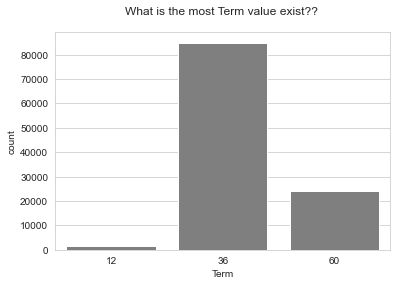

In [45]:
# let’s start with countplot for the term columns 
sns.countplot(data = sub_loan_clean, x = 'Term', color = color[7]);
plt.title('What is the most Term value exist?? \n ');

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output.png',bbox_inches='tight');

#### What is the frequance of EmploymentStatus value exist ??

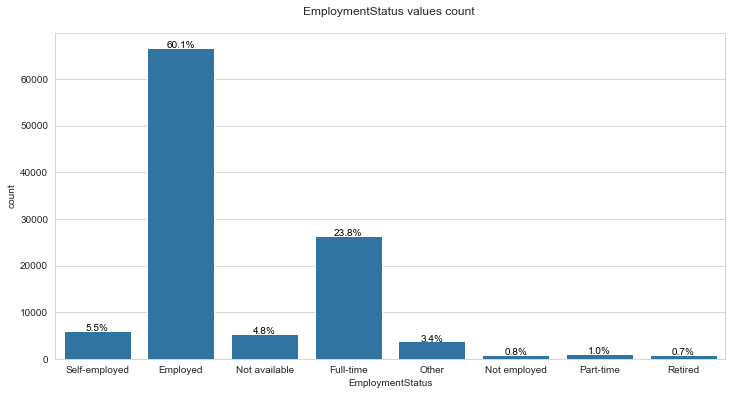

In [46]:
# let’s start with countplot for the EmploymentStatus columns 
plt.figure(figsize=(12,6))
sns.countplot(data = sub_loan_clean, x = 'EmploymentStatus', color = color[0]);

plt.title('EmploymentStatus values count \n ');

# setting the value of each columne on it
type_counts = sub_loan_clean['EmploymentStatus'].value_counts()
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/sub_loan_clean.shape[0])
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')
    
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output1.png',bbox_inches='tight');    

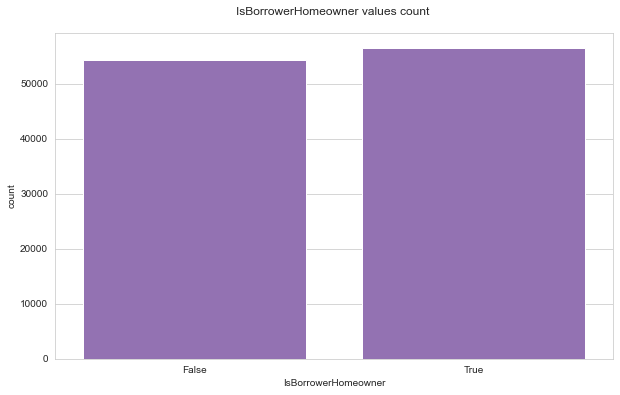

In [88]:
# let’s start with countplot for the IsBorrowerHomeowner columns 
plt.figure(figsize=(10,6))
sns.countplot(data = sub_loan_clean, x = 'IsBorrowerHomeowner', color = color[4]);

plt.title('IsBorrowerHomeowner values count \n ');


fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output2.png',bbox_inches='tight');

#### What is the frequance of IncomeRange values exist ??

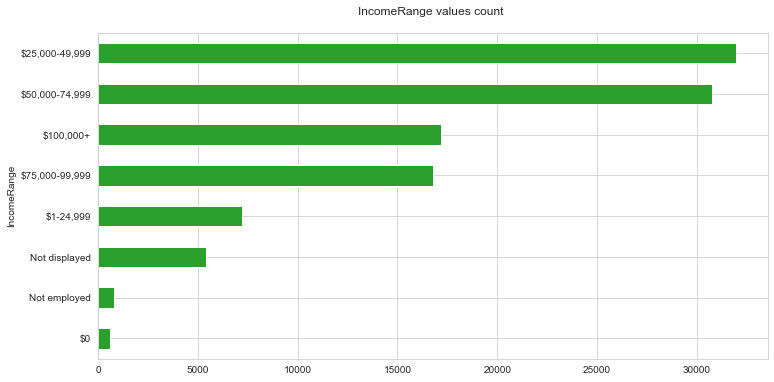

In [89]:
# ploting the IncomeRange count values after sorting them
plt.figure(figsize=(12,6))
sub_loan_clean['IncomeRange'].value_counts().sort_values(ascending=True).plot(kind='barh'
,xlabel='IncomeRange', title='IncomeRange values count \n ', color = color[2]);

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output3.png',bbox_inches='tight');

#### What’s the most status for a loan ? 

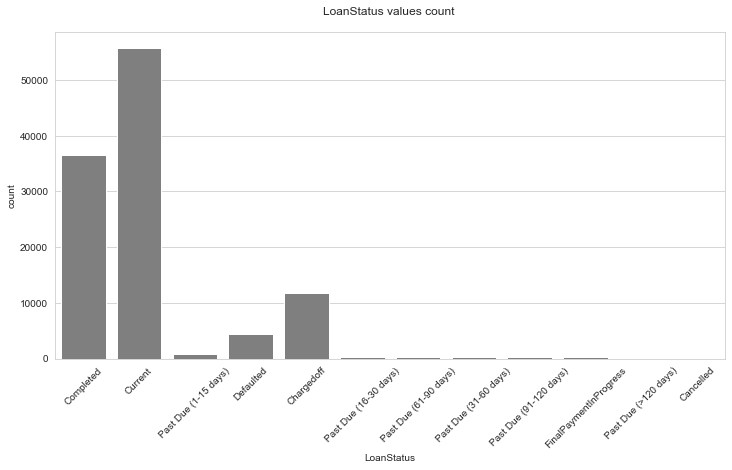

In [49]:
# let’s start with countplot for the LoanStatus columns 
plt.figure(figsize=(12,6))
sns.countplot(data = sub_loan_clean, x = 'LoanStatus', color = color[7]);
plt.xticks(rotation=45)
plt.title('LoanStatus values count \n ');

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output4.png',bbox_inches='tight');

#### what is the Distribution of BorrowerRate??

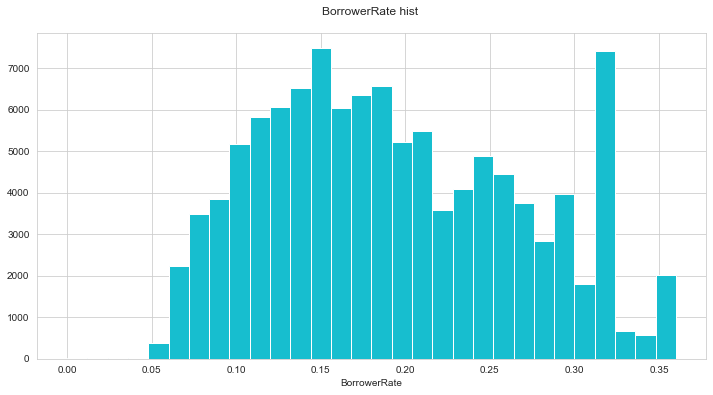

In [90]:
plt.figure(figsize=(12,6))
plt.hist(data=sub_loan_clean, x='BorrowerRate', bins=30, color = color[9]);
plt.title('BorrowerRate hist \n ');
plt.xlabel('BorrowerRate')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output5.png',bbox_inches='tight');

#### what is the Distribution of LoanOriginationDate ??

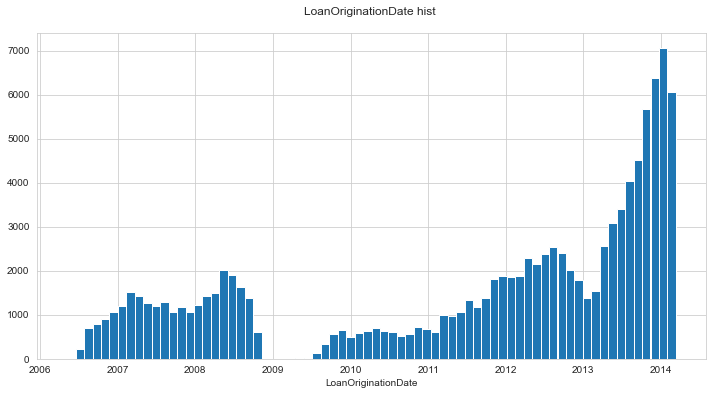

In [92]:
plt.figure(figsize=(12,6))
plt.hist(data=sub_loan_clean, x='LoanOriginationDate', bins=72, color=color[0]);
plt.title('LoanOriginationDate hist \n ');
plt.xlabel('LoanOriginationDate')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output7.png',bbox_inches='tight');

#### What is the distribution od loan over days, months and years ??

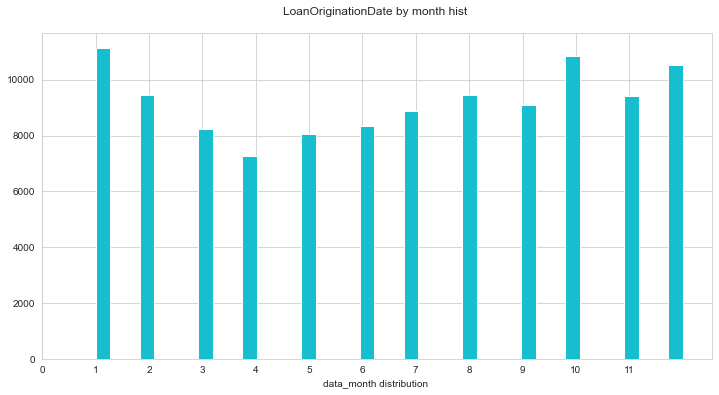

In [54]:
#preparing 
month_tricks=[0,1,2,3,4,5,6,7,8,9,10,11]
day_tricks=[0,1,2,3,4]

data_month =  sub_loan_clean['LoanOriginationDate'].dt.month
data_year =  sub_loan_clean['LoanOriginationDate'].dt.year
data_day =  sub_loan_clean['LoanOriginationDate'].dt.weekday

#ploting months
plt.figure(figsize=(12,6))
plt.hist(data_month, bins=40, color = color[9]);
plt.xticks(month_tricks)
plt.title('LoanOriginationDate by month hist \n ');
plt.xlabel('data_month distribution ')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output8.png',bbox_inches='tight');


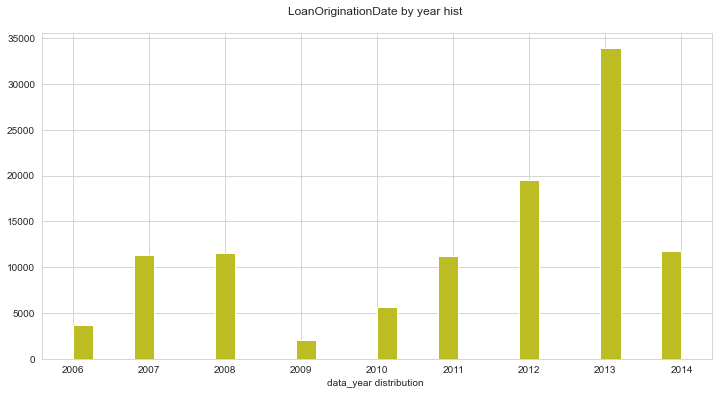

In [55]:
#ploting years
plt.figure(figsize=(12,6))
plt.hist(data_year, bins=30, color = color[8]);
plt.title('LoanOriginationDate by year hist \n ');
plt.xlabel('data_year distribution ')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output9.png',bbox_inches='tight');

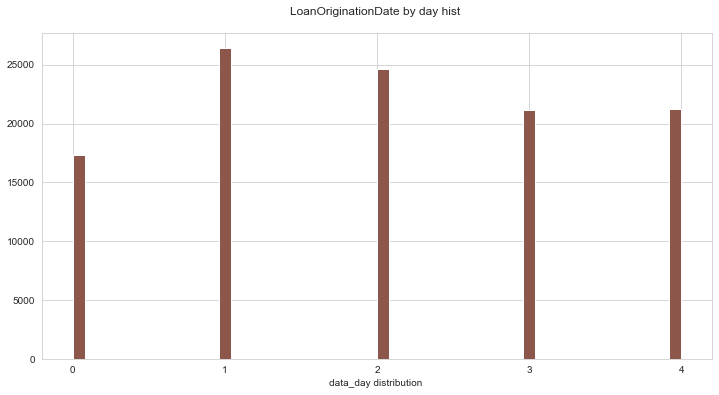

In [56]:
#ploting days
plt.figure(figsize=(12,6))
plt.hist(data_day, bins=50, color = color[5]);
plt.xticks(day_tricks)
plt.title('LoanOriginationDate by day hist \n ');
plt.xlabel('data_day distribution ')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output10.png',bbox_inches='tight');


#### what is the Distribution of LoanOriginalAmount ??

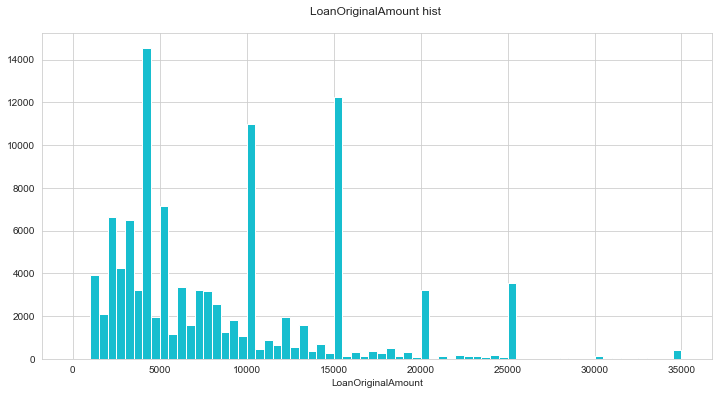

In [93]:
binsize = 500
bins = np.arange(0, sub_loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=(12,6))

plt.hist(data=sub_loan_clean, x='LoanOriginalAmount', bins=bins, color = color[9]);
plt.title('LoanOriginalAmount hist \n ');
plt.xlabel('LoanOriginalAmount')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output11.png',bbox_inches='tight');

### Univariate_Exploration_Conclusions

- first part of the exploration is finished, some questions have been answeres above by graphs like:
    - What is the frequance of EmploymentStatus value exist ?
    - What is the frequance of IncomeRange values exist ?
    - What’s the most status for a loan ?
    - what is the Distribution of BorrowerRate?
    - what is the Distribution of Investors ?
    - what is the Distribution of LoanOriginationDate ?
    - What is the distribution od loan over days, months and years ?
    - what is the Distribution of LoanOriginalAmount ?

### Bivariate Exploration
- Now, To start off with bivarite exploration,
- In this section, investigate relationships between pairs of variables in your data.

#### what is colloration between columns ?

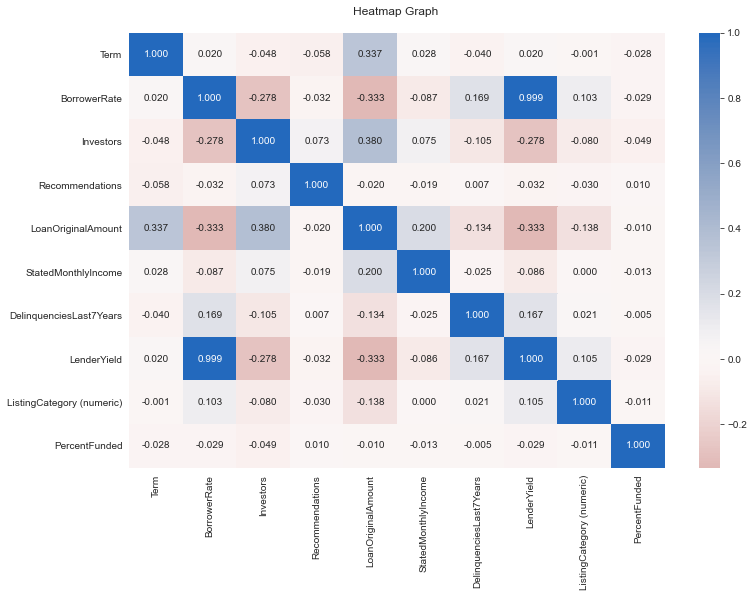

In [98]:
# correlation plot
plt.figure(figsize = [12, 8]);
sns.heatmap(num_sub_loan_clean.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

plt.title('Heatmap Graph \n ');

fig_plot = plt.gcf()
fig_plot.savefig('fig_plot_output13.png',bbox_inches='tight');

- Interestingly, there is no strong correlation between variables in this dataset except between BorrowerRate and lenderYield.

- There is some positive correlation between LoanOriginalAmount and Term, LoanOriginalAmount and StatedMonthlyIncome, LoanOriginalAmount and number of Investors, number of delinquencies and borrowers rate, Recommendations and TotalProsperLoans.

- There is also negative correlation between lenderYield and number of investors, LoanOriginalAmount and lenderYield, LoanOriginalAmount and borrower rate and number of investors and borrower rate.

#### which income range is BorrowerHomeowner ?

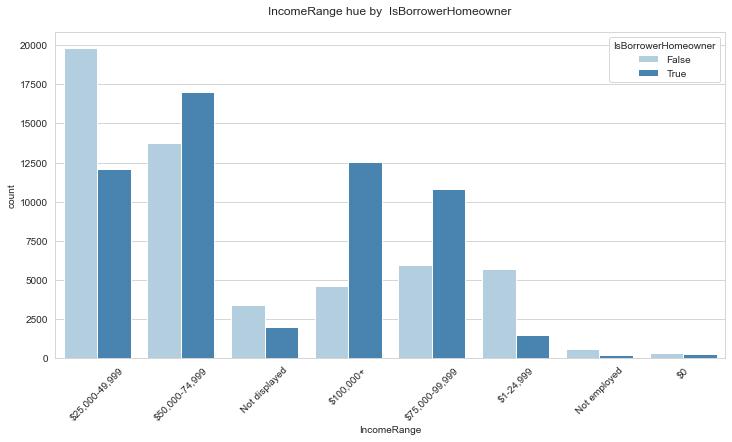

In [101]:
# ploting the IncomeRange count values after sorting them
plt.figure(figsize=(12,6))

sns.countplot(data=sub_loan_clean, x='IncomeRange', hue='IsBorrowerHomeowner', palette='Blues');
plt.xticks(rotation=45)
plt.title('IncomeRange hue by  IsBorrowerHomeowner\n ');

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output15.png',bbox_inches='tight');

- we can see IncomeRange with hue by IsBorrowerHomeowner, three section have the true hue over false one and income between 25,000 and 49,999 was the max including number of who has loans.

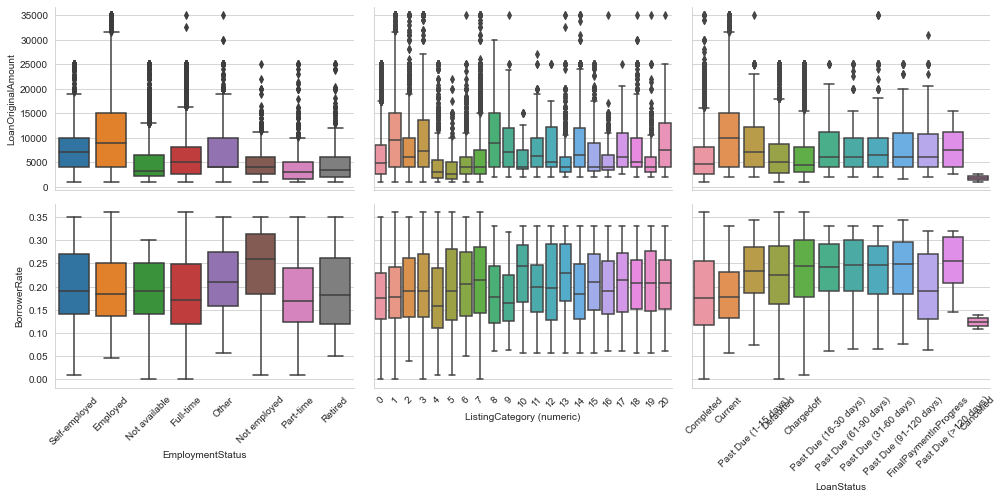

In [109]:
#LoanStatus ,EmploymentStatus ,IncomeRange,  
num_vars = ['LoanOriginalAmount', 'BorrowerRate']
cat_vars = ['EmploymentStatus', 'ListingCategory (numeric)', 'LoanStatus']


def box_grid(c1, c2, **kwargs):
    sns.boxplot(x=c1,y=c2)
    plt.xticks(rotation=45)

g = sns.PairGrid(data = sub_loan_clean, y_vars = num_vars, x_vars = cat_vars,
                height = 3, aspect = 1.5);
g.map(box_grid);

## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 6);
    
fig_plot = plt.gcf(); 
fig_plot.savefig('fig_plot_output16.png',bbox_inches='tight');

#### What is the EmploymentStatus for them?
#### Is hue by BorrowerHomeowner show diffrence in a spacific status?!

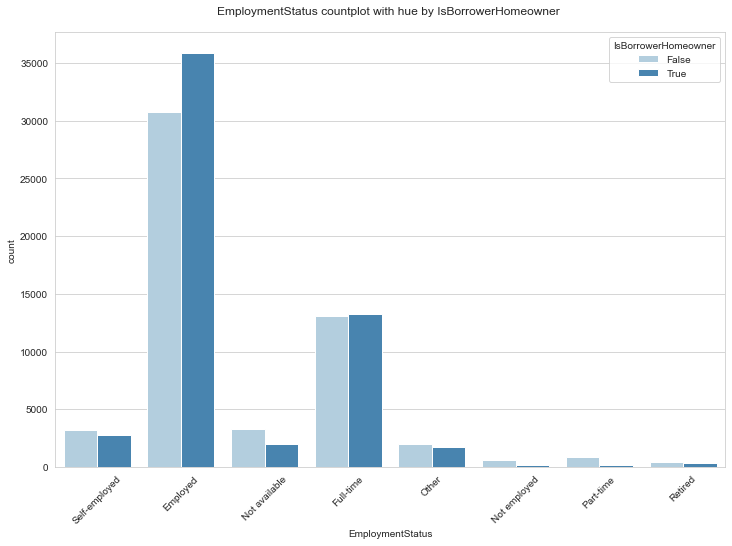

In [105]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 8]);

sns.countplot(data = sub_loan_clean, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues');
plt.xticks(rotation=45)
plt.title('EmploymentStatus countplot with hue by IsBorrowerHomeowner \n');

fig_plot = plt.gcf();
fig_plot.savefig('fig_plot_output18.png',bbox_inches='tight');

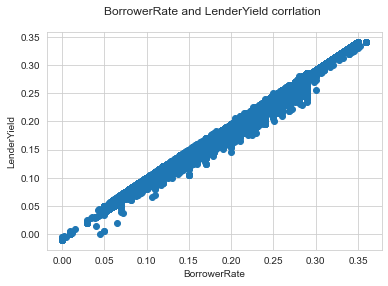

In [67]:
# BorrowerRate and LenderYield have corrlation near to 1
plt.scatter(sub_loan_clean['BorrowerRate'], sub_loan_clean['LenderYield' ])
plt.title('BorrowerRate and LenderYield corrlation \n')
plt.xlabel('BorrowerRate')
plt.ylabel('LenderYield')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output19.png',bbox_inches='tight');

#### Is IsBorrowerHomeowner change over Term values?

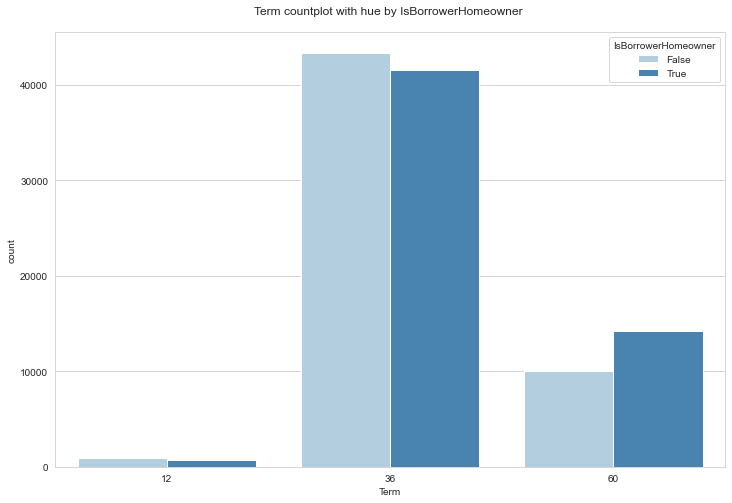

In [110]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 8]);

sns.countplot(data = sub_loan_clean, x = 'Term', hue = 'IsBorrowerHomeowner', palette = 'Blues');
plt.title('Term countplot with hue by IsBorrowerHomeowner \n');

fig_plot = plt.gcf();
fig_plot.savefig('fig_plot_output20.png',bbox_inches='tight');

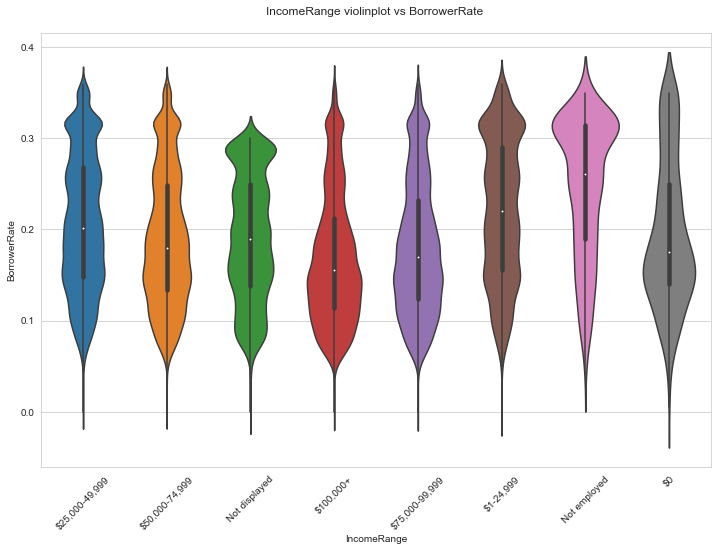

In [69]:
plt.figure(figsize = [12, 8])

sns.violinplot(data = sub_loan_clean, x = 'IncomeRange', y = 'BorrowerRate')

plt.xticks(rotation=45)
plt.title('IncomeRange violinplot vs BorrowerRate \n')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output21.png',bbox_inches='tight');

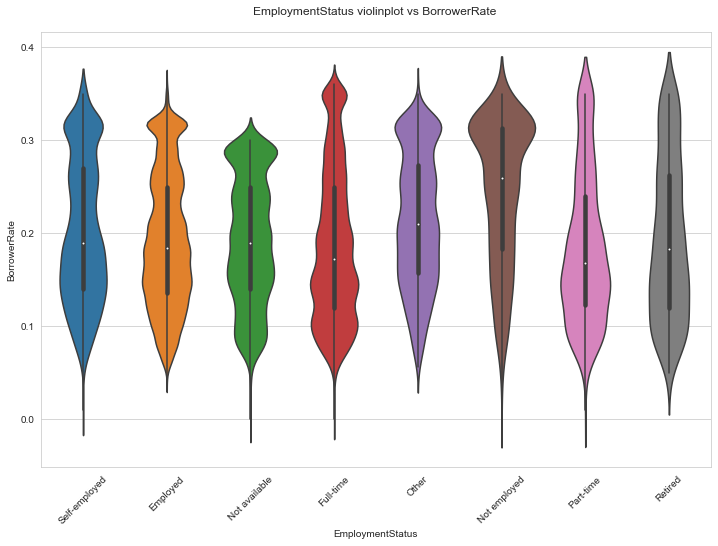

In [70]:
plt.figure(figsize = [12, 8])

sns.violinplot(data = sub_loan_clean, x = 'EmploymentStatus', y = 'BorrowerRate')

plt.xticks(rotation=45)
plt.title('EmploymentStatus violinplot vs BorrowerRate \n')

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output22.png',bbox_inches='tight');

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- there is a strong correlation between BorrowerRate and lenderYield, and other insights about correlation above after the heatmap.
- IncomeRange with hue by IsBorrowerHomeowner, three section have the true hue over false one and income between 25,000 and 49,999 was the max including number of who has loans.
- Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.
- Borrower rate for individuals with low rating is higher. High monthly income corresponds to higher rating. 
- and answer quation like:
    - What is the EmploymentStatus for them?
    - Is hue by BorrowerHomeowner show diffrence in a spacific status?!
    - Is IsBorrowerHomeowner change over Term values?

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- strong correlation between BorrowerRate and lenderYield, and interesting thing I've observed is that mid-Term (36) is the most frequent Term.

### Multivariate Exploration

- Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.



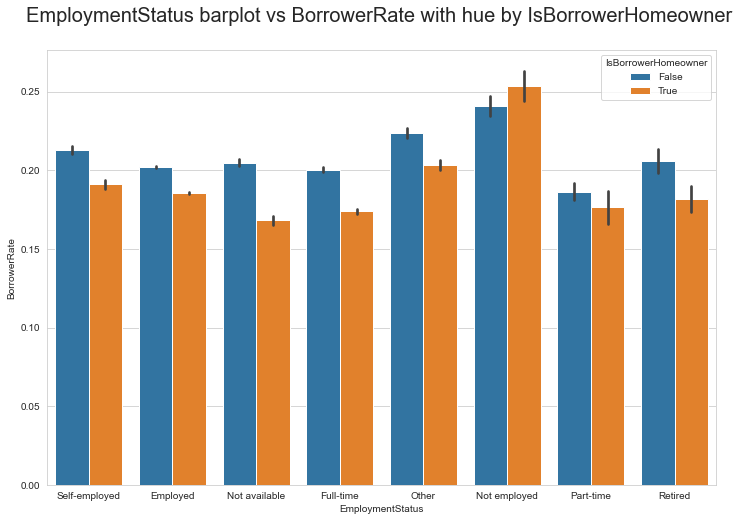

In [72]:
#
#
plt.figure(figsize = [12, 8])

sns.barplot(data = sub_loan_clean, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('EmploymentStatus barplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output23.png',bbox_inches='tight');



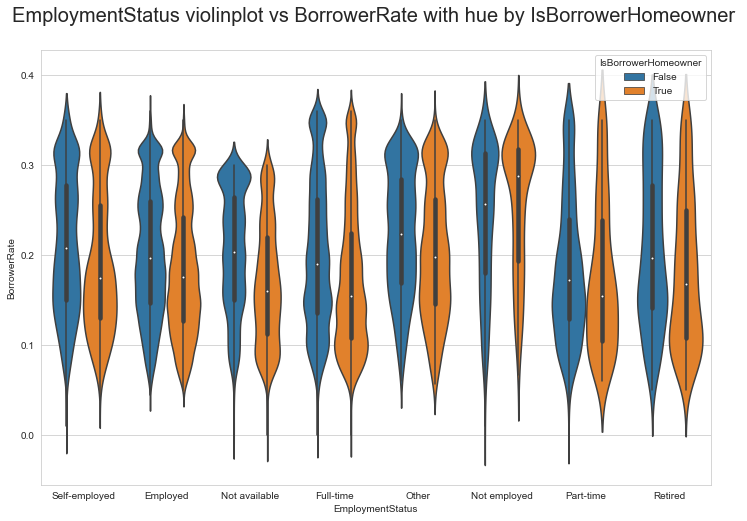

In [73]:
#
plt.figure(figsize = [12, 8])

sns.violinplot(data = sub_loan_clean, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('EmploymentStatus violinplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output24.png',bbox_inches='tight');


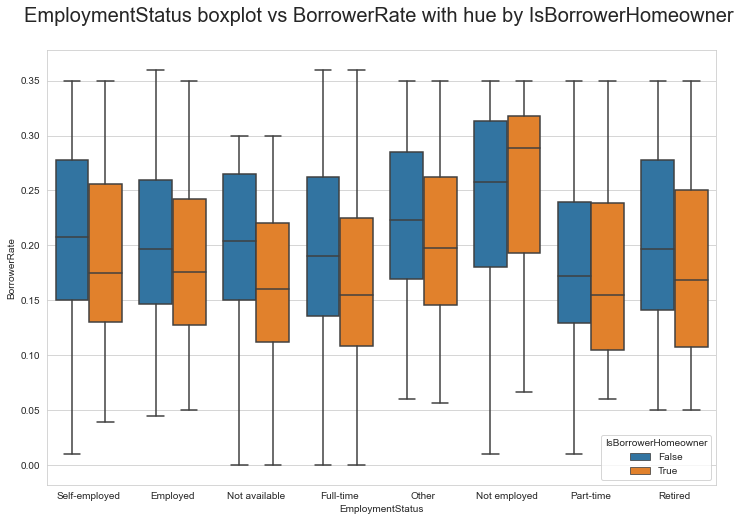

In [111]:
#
plt.figure(figsize = [12, 8])

sns.boxplot(data = sub_loan_clean, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('EmploymentStatus boxplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output25.png',bbox_inches='tight');

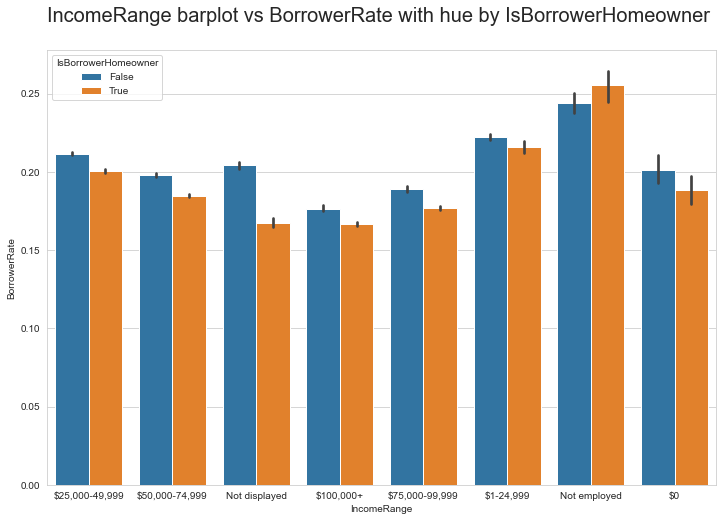

In [75]:
#
#
plt.figure(figsize = [12, 8])

sns.barplot(data = sub_loan_clean, x = 'IncomeRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('IncomeRange barplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output26.png',bbox_inches='tight');


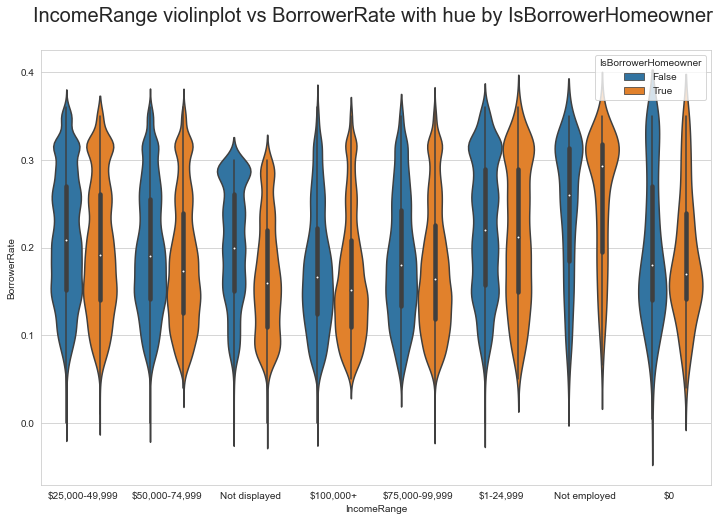

In [76]:
#
plt.figure(figsize = [12, 8])

sns.violinplot(data = sub_loan_clean, x = 'IncomeRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('IncomeRange violinplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output27.png',bbox_inches='tight');


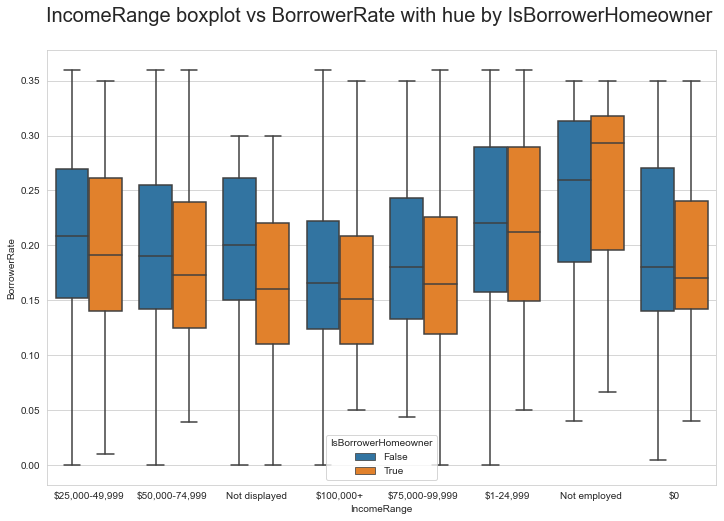

In [77]:
#
plt.figure(figsize = [12, 8])

sns.boxplot(data = sub_loan_clean, x = 'IncomeRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('IncomeRange boxplot vs BorrowerRate with hue by IsBorrowerHomeowner \n', fontsize=20)
fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output28.png',bbox_inches='tight');

plt.show()

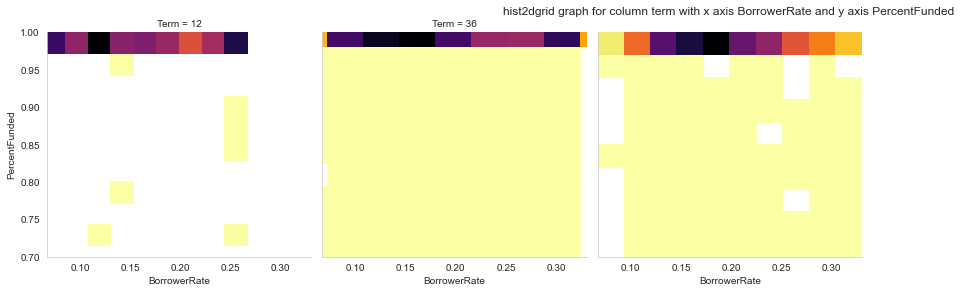

In [81]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
   
    plt.hist2d(x, y,  cmap = palette, cmin = 0.5)
    

# create faceted heat maps on levels of the cut variable
g = sns.FacetGrid(data = sub_loan_clean, col = 'Term', col_wrap = 4, height = 4,
                 )
g.map(hist2dgrid, 'BorrowerRate', 'PercentFunded', color = 'inferno_r')
g.set_xlabels('BorrowerRate')
g.set_ylabels('PercentFunded')

plt.title('hist2dgrid graph for column term with x axis BorrowerRate and y axis PercentFunded \n ');

fig_plot = plt.gcf() 
fig_plot.savefig('fig_plot_output34.png',bbox_inches='tight');

plt.show()

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- Our initial assumptions were strengthened. The outcome of credit depends on IncomeRange, Term, Employment status. Defaulted credits tend to be larger than completed for all ratings except the lowest ones. Not Employee has highest BorrowerRate. mid term (36 month) is the highest BorrowerRate. income range over than $75,000  tend to have mid_term(36).


#### Were there any interesting or surprising interactions between features?
- Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the features. However, the features also aren't fully independent and have weak corrloration. But it is interesting in something like the BorrowerRate plot for each one against IncomeRange, Term and Employmentstatus. 